In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as pt

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

from warnings import filterwarnings
filterwarnings(action='ignore')

In [3]:
df = pd.read_csv('loan_data (2).csv',index_col=0)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,01-12-2011,n,Borrower added on 12/16/11 > I'm trying to b...,other,Building my credit history.,774xx,TX,18.08,0,01-09-2004,0,NaN,NaN,2,0,9279,36.5,3,f,0.0,0.0,1476.190000,1469.34,673.48,533.42,0.0,269.29,2.52,01-11-2012,121.45,NaN,01-03-2013,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1064687,1298717,9000,9000,9000.0,36 months,13.49,305.38,C,C1,Va. Dept of Conservation/Recreation,< 1 year,RENT,30000.0,Source Verified,01-12-2011,n,Borrower added on 12/15/11 > Plan to pay off...,debt_consolidation,freedom,245xx,VA,10.08,0,01-04-2004,1,NaN,NaN,4,0,10452,91.7,9,f,0.0,0.0,2270.700000,2270.70,1256.14,570.26,0.0,444.30,4.16,01-07-2012,305.38,NaN,01-11-2012,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1065775,1299699,10000,10000,10000.0,36 months,15.27,347.98,C,C4,Chin's Restaurant,4 years,RENT,42000.0,Not Verified,01-12-2011,n,NaN,home_improvement,Home,921xx,CA,18.60,0,01-10-1998,2,61.0,NaN,14,0,24043,70.2,28,f,0.0,0.0,12519.260450,12519.26,10000.00,2519.26,0.0,0.00,0.00,01-01-2015,370.46,NaN,01-04-2015,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1069530,1291365,7000,7000,7000.0,36 months,15.96,245.97,C,C5,GREG BARRETT DRYWALL,7 years,RENT,34000.0,Source Verified,01-12-2011,n,NaN,credit_card,Credit Card Loan,934xx,CA,6.35,0,01-10-2007,1,NaN,NaN,6,0,6113,60.5,6,f,0.0,0.0,8848.940430,8848.94,7000.00,1848.94,0.0,0.00,0.00,01-01-2015,260.74,NaN,01-12-2014,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1069314,1304202,3000,3000,3000.0,36 months,18.25,108.84,D,D5,NaN,9 years,MORTGAGE,65000.0,Not Verified,01-12-2011,n,Borrower added on 12/15/11 > Combination of ...,other,Year End Cleanup,180xx,PA,17.39,0,01-09-1998,0,NaN,NaN,8,0,43936,98.1,22,f,0.0,0.0,3915.027595,3915.03,3000.00,915.03,0.0,0.00,0.00,01-01-2015,115.38,NaN,01-01-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


## About the Data

In [4]:
df.shape

(95000, 73)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95000 entries, 0 to 94999
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           95000 non-null  int64  
 1   member_id                    95000 non-null  int64  
 2   loan_amnt                    95000 non-null  int64  
 3   funded_amnt                  95000 non-null  int64  
 4   funded_amnt_inv              95000 non-null  float64
 5   term                         95000 non-null  object 
 6   int_rate                     95000 non-null  float64
 7   installment                  95000 non-null  float64
 8   grade                        95000 non-null  object 
 9   sub_grade                    95000 non-null  object 
 10  emp_title                    89483 non-null  object 
 11  emp_length                   90229 non-null  object 
 12  home_ownership               95000 non-null  object 
 13  annual_inc           

In [5]:
# We can see that there is no duplicate records present in our Data Set

df.duplicated().sum()

0

## Null Value Treatment (>30)

In [6]:
# Here we checked our null values Percentage and planned to drop columns that has more than 30% Null Values

null_val = round(df.isnull().sum()/df.shape[0]*100,0)
null_val

id                   0.0
member_id            0.0
loan_amnt            0.0
funded_amnt          0.0
funded_amnt_inv      0.0
                    ... 
total_rev_hi_lim     8.0
inq_fi              98.0
total_cu_tl         98.0
inq_last_12m        98.0
default_ind          0.0
Length: 73, dtype: float64

In [7]:
null_val[null_val>=30]

desc                            86.0
mths_since_last_delinq          51.0
mths_since_last_record          85.0
next_pymnt_d                    30.0
mths_since_last_major_derog     75.0
annual_inc_joint               100.0
dti_joint                      100.0
verification_status_joint      100.0
open_acc_6m                     98.0
open_il_6m                      98.0
open_il_12m                     98.0
open_il_24m                     98.0
mths_since_rcnt_il              98.0
total_bal_il                    98.0
il_util                         99.0
open_rv_12m                     98.0
open_rv_24m                     98.0
max_bal_bc                      98.0
all_util                        98.0
inq_fi                          98.0
total_cu_tl                     98.0
inq_last_12m                    98.0
dtype: float64

In [8]:
null_val_list = list(null_val[null_val>=30].index)

In [9]:
df.drop(null_val_list,axis=1,inplace=True)

## Manually Identifing Redundant Variables

In [10]:
df.id.value_counts()

id
1071570     1
60741793    1
60963142    1
60783015    1
60913825    1
           ..
28803114    1
29163546    1
29213577    1
29243601    1
36271333    1
Name: count, Length: 95000, dtype: int64

In [11]:
df.member_id.value_counts()

member_id
1306721     1
64783610    1
65004961    1
64824817    1
64955660    1
           ..
31326276    1
31706710    1
31746741    1
31776769    1
38982739    1
Name: count, Length: 95000, dtype: int64

In [12]:
df.zip_code.value_counts()

zip_code
750xx    1030
945xx     984
112xx     940
606xx     923
300xx     858
         ... 
833xx       1
522xx       1
429xx       1
643xx       1
204xx       1
Name: count, Length: 877, dtype: int64

In [13]:
loan_amnt_and_funded_amnt_diff = df[df.loan_amnt != df.funded_amnt]
loan_amnt_and_funded_amnt_diff.shape

# Loan amount and Funded amount has only 194 different records out of 95000 records

(194, 51)

In [14]:
funded_amnt_and_funded_amnt_inv_diff = df[df.funded_amnt != df.funded_amnt_inv]
funded_amnt_and_funded_amnt_inv_diff.shape

# Funded amount and Funded amount Inverster columns has only 10645 different records out of 95000 records

(10645, 51)

In [15]:
out_prncp_and_out_prncp_inv_diff = df[df.out_prncp != df.out_prncp_inv]
out_prncp_and_out_prncp_inv_diff.shape

# Outstanding Principal Amount and Outstanding Principal Inverster Amount columns
# has only 5734 different records out of 95000 records

(5734, 51)

In [16]:
total_pymnt_and_total_pymnt_inv_diff = df[df.total_pymnt != df.total_pymnt_inv]
total_pymnt_and_total_pymnt_inv_diff.shape

# Total Payment Received and Total Invester Payment Received columns
# has only 18082 different records out of 95000 records

(18082, 51)

In [17]:
df.pymnt_plan.value_counts()

# Payment Plan has only 'n' for all the records

pymnt_plan
n    95000
Name: count, dtype: int64

In [18]:
df.policy_code.value_counts()

# Policy Code has only '1' for all the records

policy_code
1    95000
Name: count, dtype: int64

## Removing Redundant Variables

In [19]:
# Here we have dropped 'id','member_id','zip_code' columns because it has unique values for all columns and
# Dropped 'loan_amnt' because it has only 194 different records from 'funded_amnt'

df.drop(['id','member_id','loan_amnt','zip_code'],axis=1,inplace=True)

In [20]:
# Here we are dropping 'next_pymnt_d' because it has around 30% Null Values
# and we are dropping 'funded_amnt_inv','out_prncp_inv','total_pymnt_inv' because they 
# have similar values as 'funded_amnt','out_prncp','total_pymnt'

df.drop(['funded_amnt_inv','out_prncp_inv','total_pymnt_inv'],axis=1,inplace=True)

In [21]:
# We Drop 'Payment Plan' because it has same 'n' value for all the rows
# We Drop 'policy_code' because it has same '1' value for all the rows

df.drop(['pymnt_plan','policy_code'],axis=1,inplace=True)

## Null Value Treatment (<30)

In [22]:
round(df.isnull().sum()/df.shape[0]*100,2)

funded_amnt                   0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     5.81
emp_length                    5.02
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
purpose                       0.00
title                         0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec                       0.00
revol_bal                     0.00
revol_util                    0.05
total_acc                     0.00
initial_list_status           0.00
out_prncp                     0.00
total_pymnt                   0.00
total_rec_prncp               0.00
total_rec_int       

In [23]:
df_num = df.select_dtypes('number')
df_cat = df.select_dtypes('object')

In [24]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_num = pd.DataFrame(imputer.fit_transform(df_num),columns=df_num.columns)

In [25]:
for i in list(df_cat.columns):
    df_cat[i].fillna(df_cat[i].mode()[0],inplace=True)

In [26]:
print(df_num.isna().sum())
print(df_cat.isna().sum())

funded_amnt                   0
int_rate                      0
installment                   0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
total_pymnt                   0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
default_ind                   0
dtype: int64
term                   0
grade                  0
sub_grade              0
emp_title              0
emp_length             0
home_ownership         0
verif

## Checking for Outliers

In [27]:
for i in list(df_num.columns):
    print('------------------------------------------------')
    print(df_num[i].value_counts())
    print('------------------------------------------------')

------------------------------------------------
funded_amnt
10000.0    6652
12000.0    5423
15000.0    4995
20000.0    4982
35000.0    3901
           ... 
34975.0       1
30725.0       1
29025.0       1
31875.0       1
31925.0       1
Name: count, Length: 1305, dtype: int64
------------------------------------------------
------------------------------------------------
int_rate
10.99    3782
9.17     2815
15.61    2685
9.99     2335
7.89     2281
         ... 
14.62       1
9.07        1
11.78       1
13.04       1
14.12       1
Name: count, Length: 442, dtype: int64
------------------------------------------------
------------------------------------------------
installment
327.34    306
318.79    221
382.55    183
491.01    180
392.81    172
         ... 
260.25      1
639.68      1
298.41      1
537.19      1
335.23      1
Name: count, Length: 26080, dtype: int64
------------------------------------------------
------------------------------------------------
annual_inc
60000.00 

In [28]:
# Here we are doing outlier treatment only for columns that has large number of different values

num_ot = df_num[['funded_amnt','int_rate','installment','annual_inc','dti','open_acc','revol_bal','revol_util',
                    'total_acc','out_prncp','total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee',
                    'recoveries','collection_recovery_fee','last_pymnt_amnt','tot_coll_amt','tot_cur_bal',
                    'total_rev_hi_lim']]

num_no_ot = df[list(df_num.drop(num_ot,axis=1).columns)]

In [29]:
num_no_ot.shape

(95000, 6)

Column Name:  funded_amnt


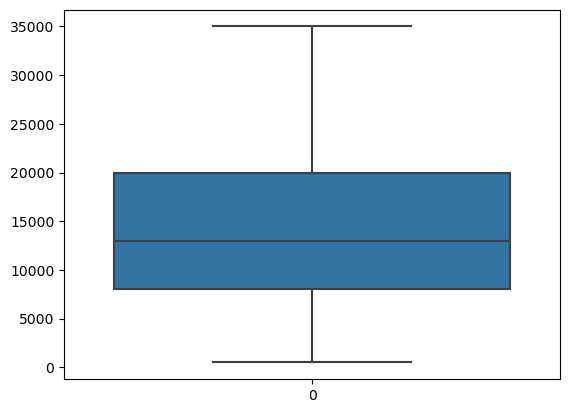

Column Name:  int_rate


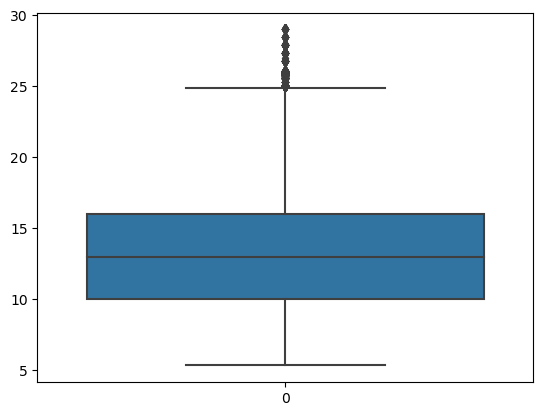

Column Name:  installment


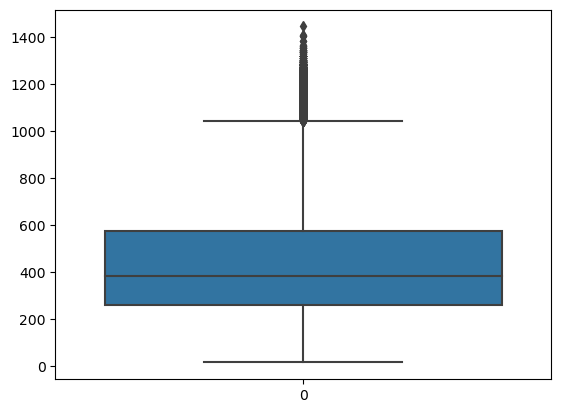

Column Name:  annual_inc


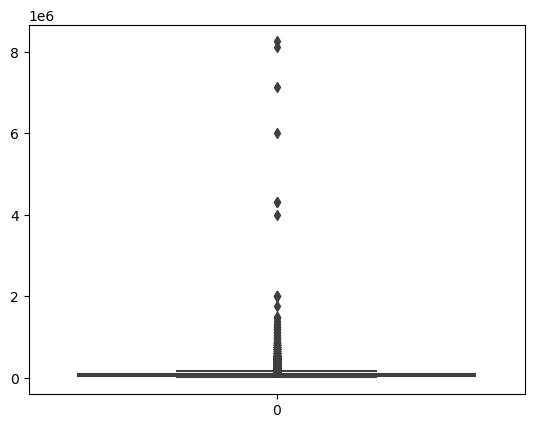

Column Name:  dti


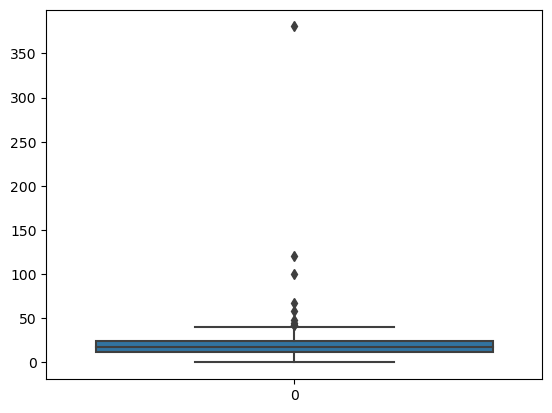

Column Name:  open_acc


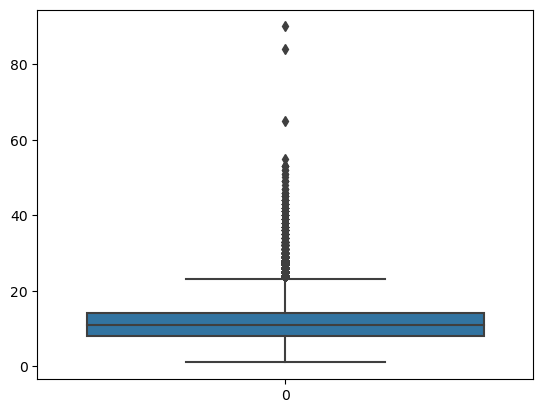

Column Name:  revol_bal


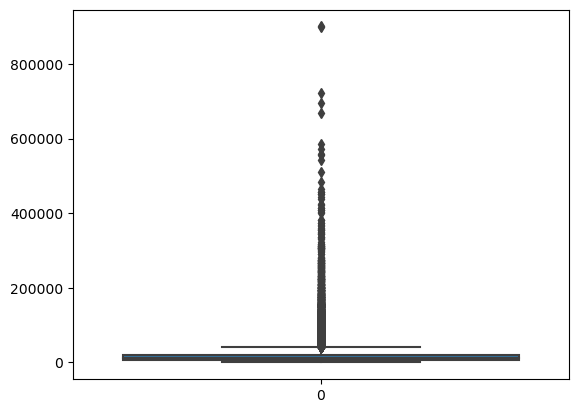

Column Name:  revol_util


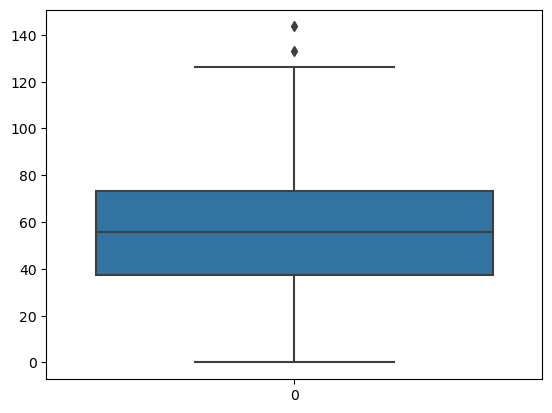

Column Name:  total_acc


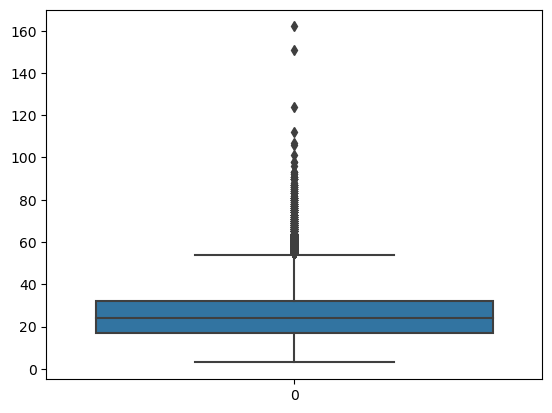

Column Name:  out_prncp


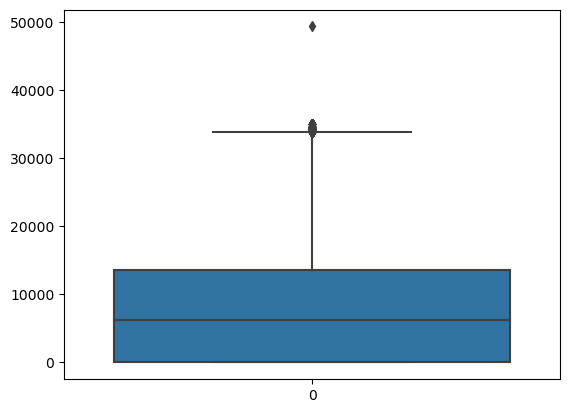

Column Name:  total_pymnt


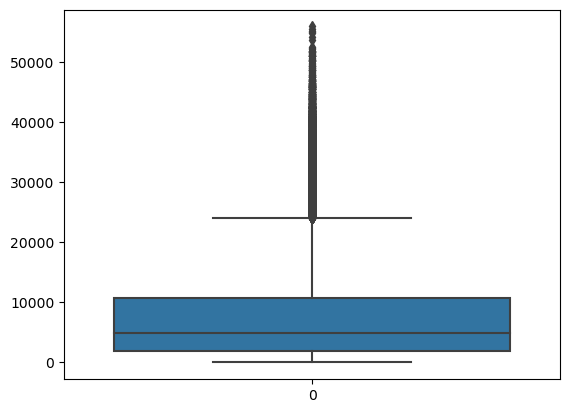

Column Name:  total_rec_prncp


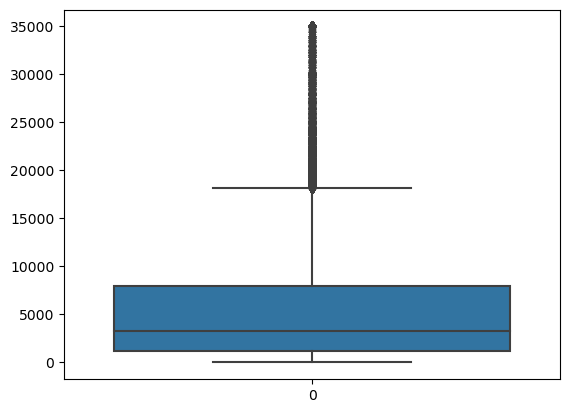

Column Name:  total_rec_int


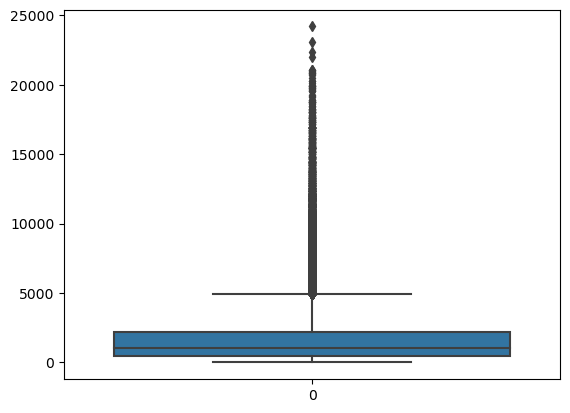

Column Name:  total_rec_late_fee


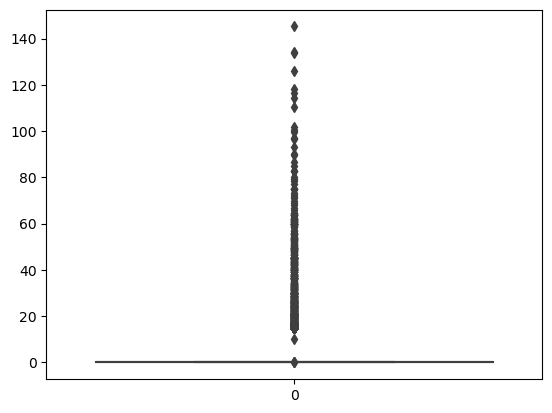

Column Name:  recoveries


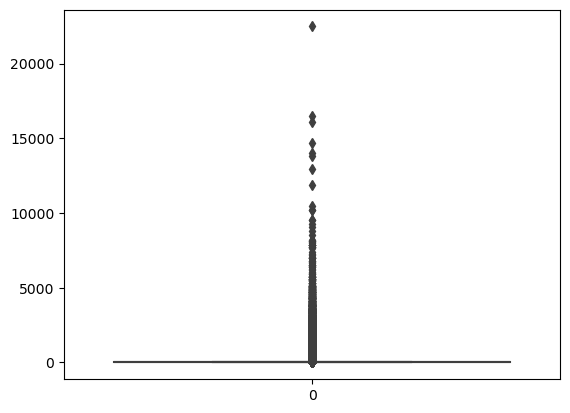

Column Name:  collection_recovery_fee


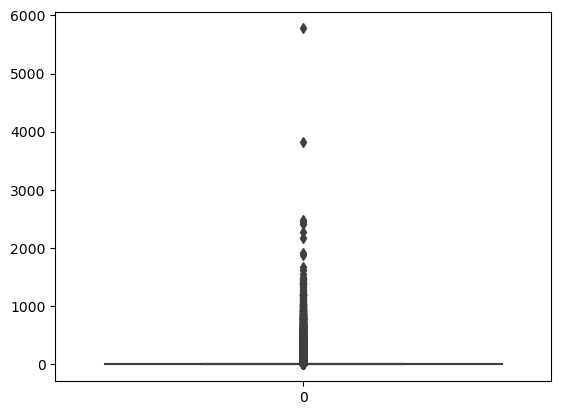

Column Name:  last_pymnt_amnt


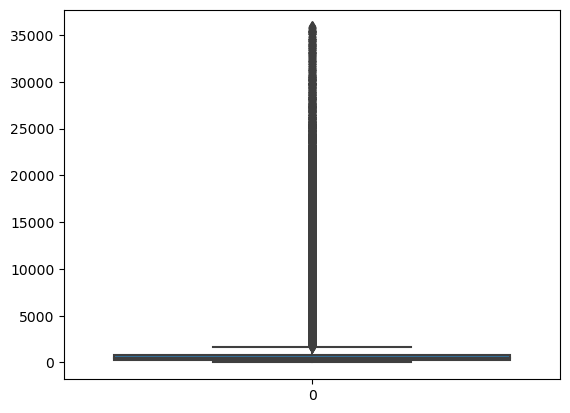

Column Name:  tot_coll_amt


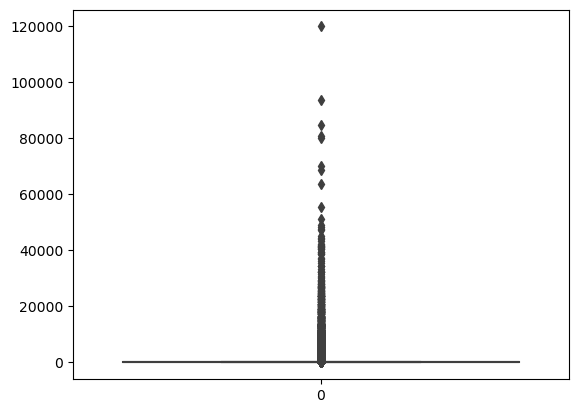

Column Name:  tot_cur_bal


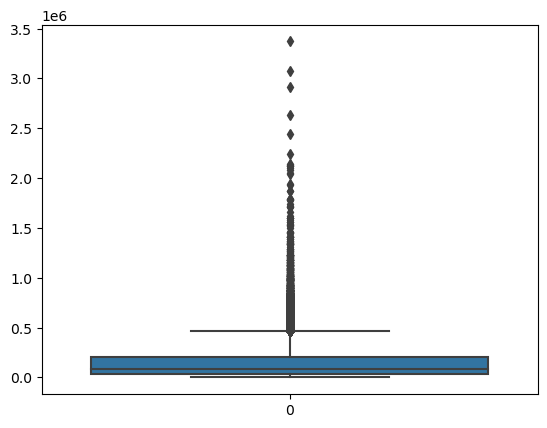

Column Name:  total_rev_hi_lim


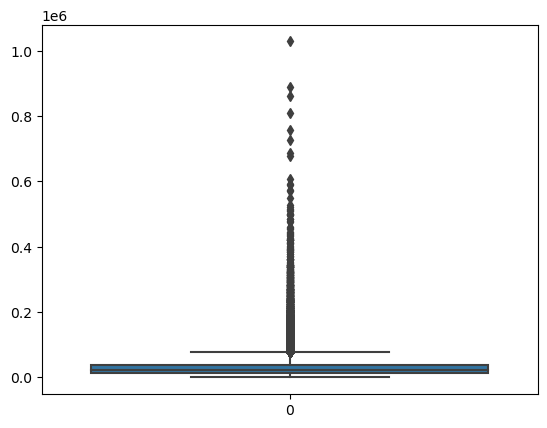

In [30]:
# Here we are checking for outliers

for i in list(num_ot.columns):
    print('Column Name: ',i)
    sns.boxplot(num_ot[i])
    plt.show()

In [31]:
# Here we are seeing how many Percentage of Outliers are Present in each Column

for i in list(df_num.columns):
    q1 = df_num[i].quantile(0.25)
    q3 = df_num[i].quantile(0.75)
    iqr= q3-q1
    ul = q3+(1.5*iqr)
    ll = q1-(1.5*iqr)
    outliers = df_num[(df_num[i]>ul) | (df_num[i]<ll)]
    outliers_per = round(len(outliers) / df_num.shape[0],2)
    print(f'{i}: {outliers_per:.2%}')

funded_amnt: 0.00%
int_rate: 1.00%
installment: 3.00%
annual_inc: 5.00%
dti: 0.00%
delinq_2yrs: 19.00%
inq_last_6mths: 6.00%
open_acc: 3.00%
pub_rec: 15.00%
revol_bal: 5.00%
revol_util: 0.00%
total_acc: 2.00%
out_prncp: 0.00%
total_pymnt: 5.00%
total_rec_prncp: 7.00%
total_rec_int: 7.00%
total_rec_late_fee: 1.00%
recoveries: 3.00%
collection_recovery_fee: 3.00%
last_pymnt_amnt: 18.00%
collections_12_mths_ex_med: 1.00%
acc_now_delinq: 0.00%
tot_coll_amt: 17.00%
tot_cur_bal: 3.00%
total_rev_hi_lim: 6.00%
default_ind: 5.00%


## Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [33]:
df_cat.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,purpose,title,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,60 months,B,B5,Starbucks,< 1 year,RENT,Verified,01-12-2011,other,Building my credit history.,TX,01-09-2004,f,01-11-2012,01-03-2013,INDIVIDUAL
1,36 months,C,C1,Va. Dept of Conservation/Recreation,< 1 year,RENT,Source Verified,01-12-2011,debt_consolidation,freedom,VA,01-04-2004,f,01-07-2012,01-11-2012,INDIVIDUAL
2,36 months,C,C4,Chin's Restaurant,4 years,RENT,Not Verified,01-12-2011,home_improvement,Home,CA,01-10-1998,f,01-01-2015,01-04-2015,INDIVIDUAL
3,36 months,C,C5,GREG BARRETT DRYWALL,7 years,RENT,Source Verified,01-12-2011,credit_card,Credit Card Loan,CA,01-10-2007,f,01-01-2015,01-12-2014,INDIVIDUAL
4,36 months,D,D5,Teacher,9 years,MORTGAGE,Not Verified,01-12-2011,other,Year End Cleanup,PA,01-09-1998,f,01-01-2015,01-01-2016,INDIVIDUAL


In [34]:
# Here we use dummy encoding, because the column 'term' has two sub-category only.

dum1 = pd.get_dummies(df_cat.term,dtype='int')

In [35]:
# Here we use Oridinal Encoding, because the column 'grade' has hierarchy data.

oe = OrdinalEncoder(categories=[['A','B','C','D','E','F','G']],dtype='int')
df_cat.grade = oe.fit_transform(df_cat[['grade']])

In [36]:
# Here we use Oridinal Encoding, because the column 'sub grade' has hierarchy data.

oe=OrdinalEncoder(categories=[list(pd.Series(df_cat.sub_grade.value_counts().index).sort_values().values)],dtype='int')
df_cat.sub_grade = oe.fit_transform(df_cat[['sub_grade']])

In [37]:
# Here we use Label Encoding, because the column 'employee title' has many unique records.

le = LabelEncoder()
df_cat.emp_title = le.fit_transform(df[['emp_title']])

In [38]:
def number_extract(x):
    a = list(x)
    b = []
    for i in a:
        if i in ['<']:
            return 0.5
        elif i in ['+']:
            return 11
        else:
            if i in ['1','2','3','4','5','6','7','8','9']:
                b.append(i)
    return int(''.join(b))

In [39]:
# Here I took only the number part of all the records in column 'employee lenght'.

df_cat.emp_length = df_cat.emp_length.map(lambda x: number_extract(x))

In [40]:
# Here we use Label Encoding, because the column 'Home Ownership' has 5 types of names present in it.

le = LabelEncoder()
df_cat.home_ownership = le.fit_transform(df[['home_ownership']])

In [41]:
# Here The meaning of 'Source Verified' and 'Verified' are same, so I combined them.

df_cat.verification_status = df_cat.verification_status.replace('Source Verified','Verified')

In [42]:
# Here we use dummy encoding, because the column 'Verification Status' has two sub-category only after combining them.

dum2 = pd.get_dummies(df_cat.verification_status,dtype='int')

In [43]:
# Here we use Label Encoding, because the column 'Purpose' has 14 types of names present in it.

le = LabelEncoder()
df_cat.purpose = le.fit_transform(df[['purpose']])

In [44]:
# Here we use Label Encoding, because the column 'Title' has many unique records.

le = LabelEncoder()
df_cat.title = le.fit_transform(df[['title']])

In [45]:
# Here we use Label Encoding, because the column 'Address State' has 51 types of names present in it.

le = LabelEncoder()
df_cat.addr_state = le.fit_transform(df[['addr_state']])

In [46]:
# Here we use dummy encoding, because the column 'Initial List Status' has two sub-category only.

dum3 = pd.get_dummies(df['initial_list_status'],dtype='int')

In [47]:
# Here we use dummy encoding, because the column 'Application Type' has two sub-category only.

dum4 = pd.get_dummies(df['application_type'],dtype='int')

In [48]:
# Here we are concating the dummy encoded variables back to categorical DataFrame.

df_cat = pd.concat([df_cat,dum1,dum2,dum3,dum4],axis=1)

In [49]:
# After concating the encoded variables, we dont need the original Columns.

df_cat.drop(['term','verification_status','initial_list_status','application_type'],axis=1,inplace=True)

In [50]:
# Here we are converting 'Issue Date' into four seperate columns to gather some inference out of it.

df_cat.issue_d = pd.to_datetime(df_cat.issue_d)

df_cat['issue_d_day'] = df_cat.issue_d.dt.year
df_cat['issue_d_month'] = df_cat.issue_d.dt.month
df_cat['issue_d_day'] = df_cat.issue_d.dt.day
df_cat['issue_d_dayofweek'] = df_cat.issue_d.dt.dayofweek # Monday=0, Sunday=6

In [51]:
# Here we are converting 'Last Payment Date' into four seperate columns to gather some inference out of it.

df_cat.last_pymnt_d = pd.to_datetime(df_cat.last_pymnt_d)

df_cat['last_pymnt_d_day'] = df_cat.last_pymnt_d.dt.year
df_cat['last_pymnt_d_month'] = df_cat.last_pymnt_d.dt.month
df_cat['last_pymnt_d_day'] = df_cat.last_pymnt_d.dt.day
df_cat['last_pymnt_d_dayofweek'] = df_cat.last_pymnt_d.dt.dayofweek

In [52]:
# Here we are converting 'Earliest Payment Date' into four seperate columns to gather some inference out of it.

df_cat.earliest_cr_line = pd.to_datetime(df_cat.earliest_cr_line)

df_cat['earliest_cr_line_day'] = df_cat.earliest_cr_line.dt.year
df_cat['earliest_cr_line_month'] = df_cat.earliest_cr_line.dt.month
df_cat['earliest_cr_line_day'] = df_cat.earliest_cr_line.dt.day
df_cat['earliest_cr_line_dayofweek'] = df_cat.earliest_cr_line.dt.dayofweek

In [53]:
# Here we are converting 'LC Pulled Credit Date' into four seperate columns to gather some inference out of it.

df_cat.last_credit_pull_d = pd.to_datetime(df_cat.last_credit_pull_d)

df_cat['last_credit_pull_d_day'] = df_cat.last_credit_pull_d.dt.year
df_cat['last_credit_pull_d_month'] = df_cat.last_credit_pull_d.dt.month
df_cat['last_credit_pull_d_day'] = df_cat.last_credit_pull_d.dt.day
df_cat['last_credit_pull_d_dayofweek'] = df_cat.last_credit_pull_d.dt.dayofweek

In [54]:
# Here we are droping the Original Columns.

df_cat.drop(['issue_d','last_pymnt_d','earliest_cr_line','last_credit_pull_d'],axis=1,inplace=True)

In [101]:
# Here we are concating the categorical and Numerical DataFrame into single DataFrame for Model Building.

df = pd.concat([df_cat,df_num],axis=1)

## Identifing Important Features

In [56]:
from sklearn.tree import DecisionTreeClassifier

x = df.drop('default_ind',axis=1)
y = df.default_ind

dt = DecisionTreeClassifier(random_state=10)
dt.fit(x,y)
fi = pd.DataFrame(dt.feature_importances_,index=x.columns).sort_values(by=0,ascending=False)

In [57]:
idf = df[list(np.cumsum(fi).head(7).index)]

In [58]:
idf.head()

,recoveries,total_rec_prncp,funded_amnt,out_prncp,last_pymnt_d_dayofweek,last_pymnt_amnt,installment
0,269.29,673.48,5375.0,0.0,2,121.45,121.45
1,444.30,1256.14,9000.0,0.0,5,305.38,305.38
2,0.00,10000.00,10000.0,0.0,3,370.46,347.98
3,0.00,7000.00,7000.0,0.0,3,260.74,245.97
4,0.00,3000.00,3000.0,0.0,3,115.38,108.84


## Uni-Variate analysis only for Important Features

<Axes: ylabel='count'>

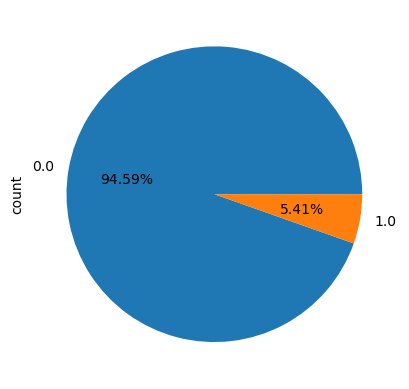

In [59]:
df.default_ind.value_counts().plot(kind='pie',autopct='%.2f%%')

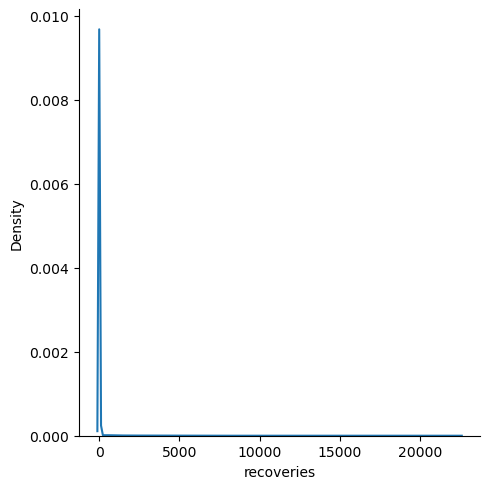

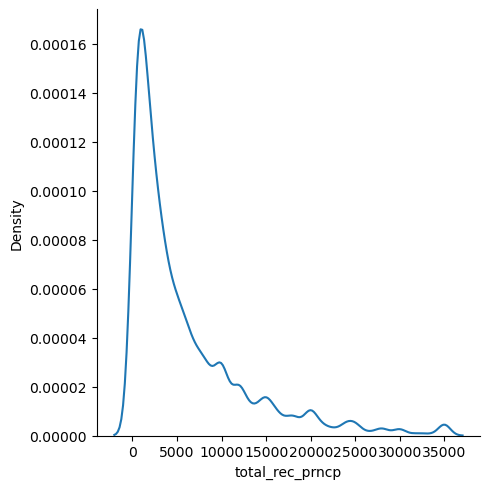

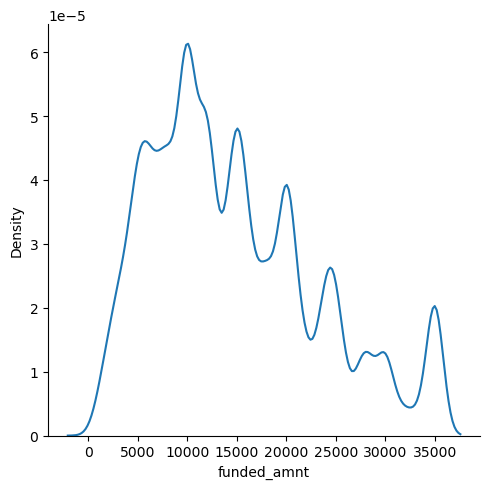

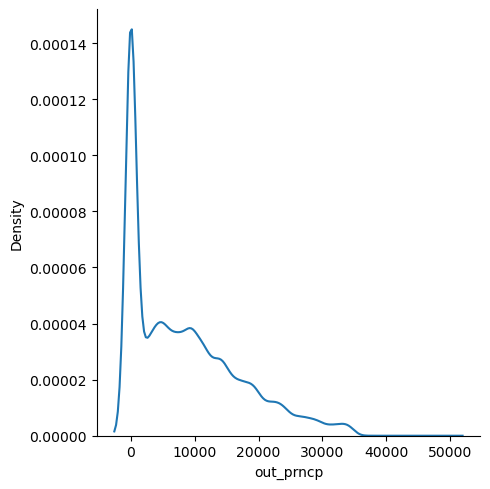

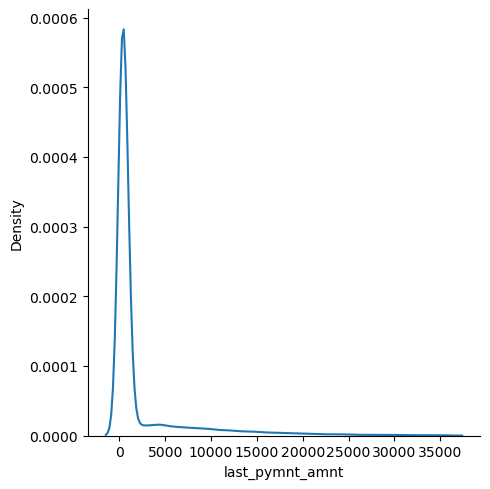

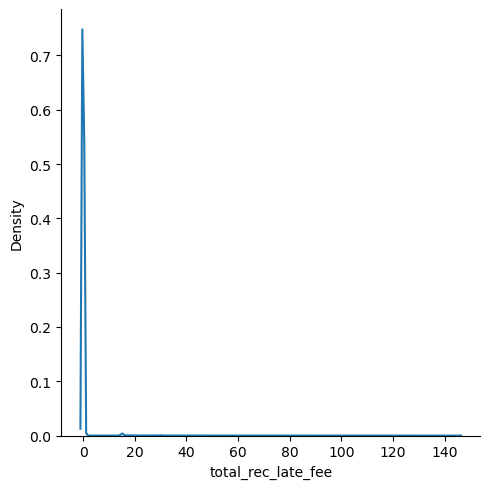

In [60]:
for i in ['recoveries','total_rec_prncp','funded_amnt','out_prncp','last_pymnt_amnt','total_rec_late_fee']: 
    sns.displot(x=df[i],kind='kde')
    plt.show()

<Axes: xlabel='last_pymnt_d_dayofweek'>

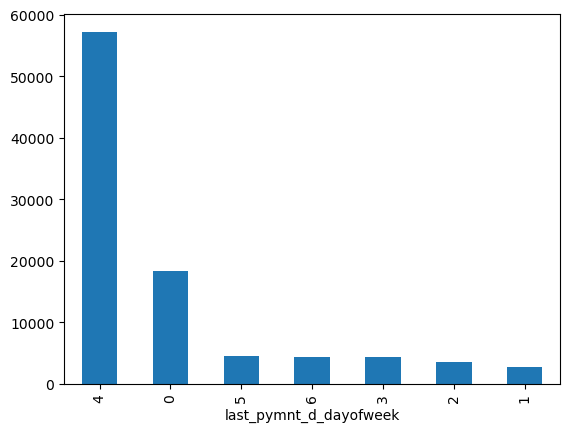

In [61]:
df.last_pymnt_d_dayofweek.value_counts().plot(kind='bar')

## Bi-Variate analysis only for Important Features

<Axes: >

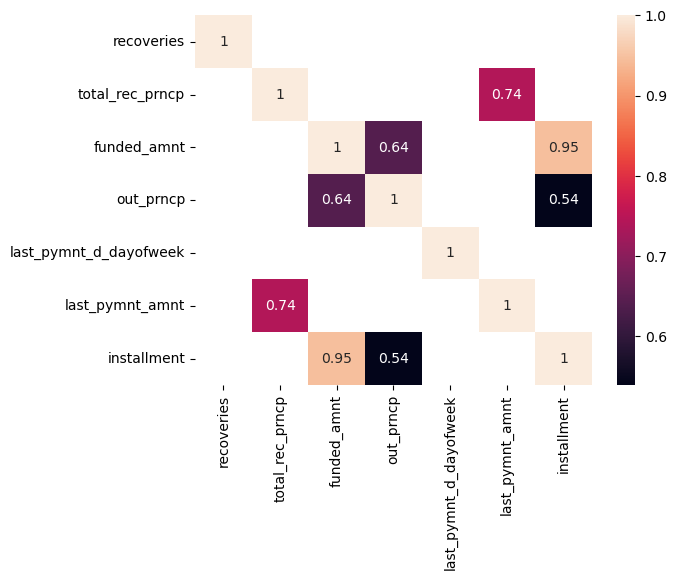

In [62]:
corr = idf.corr()
sns.heatmap(corr[(corr>0.5)|(corr<-0.5)],annot=True)

<Axes: xlabel='last_pymnt_d_dayofweek'>

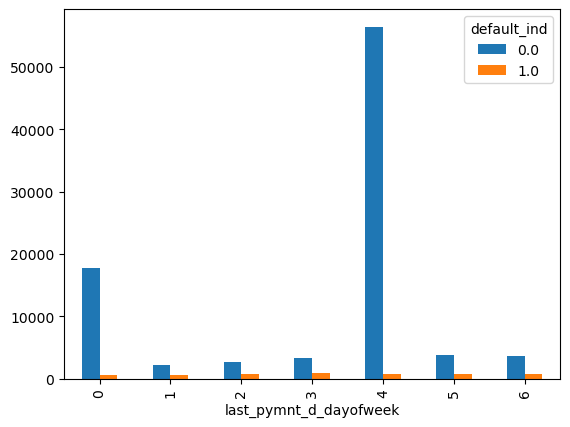

In [63]:
pd.crosstab(idf.last_pymnt_d_dayofweek,df.default_ind).plot(kind='bar')

### Chi-Square Test:
#### State Null Hypothesis

* H0 - There is No statstically significant association between two variables
* H1 - There is Statstically significant association between two variables

In [64]:
from scipy.stats import chi2_contingency

observed = pd.crosstab(df.last_pymnt_d_dayofweek,df.default_ind)
chi2_contingency(observed.values)[1]

0.0

In [65]:
# we can see that p-value is less than 0.05, we Fail to reject Null Hypothesis
# There is No statstically significant association between two variables

### T-Test Independance Test:
#### State Null Hypothesis

* H0 - There is No statstically significant difference between mean of subgroups
* H1 - There is Statstically significant difference between mean of subgroups

In [66]:
from scipy import stats

pval = []

loop = ['recoveries','total_rec_prncp','funded_amnt','out_prncp','last_pymnt_amnt','total_rec_late_fee']
for i in loop:
    a = df[df.default_ind == 0][i]
    b = df[df.default_ind == 1][i]
    pval.append(stats.ttest_ind(a,b)[1])
pd.DataFrame(pval,index=loop)>0.05

,0
recoveries,False
total_rec_prncp,False
funded_amnt,False
out_prncp,False
last_pymnt_amnt,False
total_rec_late_fee,False


Inferance:
    - We can say that, Statistically there is no difference between mean of subgroups.
    - This is good for model building

## Logistic Base Model

In [102]:
from sklearn.model_selection import train_test_split

x = df.drop('default_ind',axis=1)
y = df.default_ind
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,random_state=100)

In [103]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(xtrain,ytrain)
ytpred = lr.predict(xtrain)
ypred = lr.predict(xtest)

In [104]:
from sklearn.metrics import classification_report

print(classification_report(ytrain,ytpred))
print()
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     62910
         1.0       1.00      0.96      0.98      3590

    accuracy                           1.00     66500
   macro avg       1.00      0.98      0.99     66500
weighted avg       1.00      1.00      1.00     66500


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     26955
         1.0       1.00      0.96      0.98      1545

    accuracy                           1.00     28500
   macro avg       1.00      0.98      0.99     28500
weighted avg       1.00      1.00      1.00     28500



## Logistic Model after Doing Outlier Treatment

In [105]:
num_ot = ['funded_amnt','int_rate','installment','annual_inc','dti','open_acc','revol_bal','revol_util','total_acc',
          'out_prncp','total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
          'collection_recovery_fee','last_pymnt_amnt','tot_coll_amt','tot_cur_bal','total_rev_hi_lim']

In [106]:
# Here we are doing outlier treatment using Dropping Technique

for i in num_ot:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr= q3-q1
    ul = q3+1.5*iqr
    ll = q1-1.5*iqr
    ot_df = df[~(df[i]>ul)|(df[i]<ll)]

In [107]:
from sklearn.model_selection import train_test_split

x = ot_df.drop('default_ind',axis=1)
y = ot_df.default_ind
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,random_state=100)

In [108]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(xtrain,ytrain)
ytpred = lr.predict(xtrain)
ypred = lr.predict(xtest)

In [109]:
print(classification_report(ytrain,ytpred))
print()
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     59167
         1.0       1.00      0.96      0.98      3486

    accuracy                           1.00     62653
   macro avg       1.00      0.98      0.99     62653
weighted avg       1.00      1.00      1.00     62653


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     25325
         1.0       1.00      0.96      0.98      1527

    accuracy                           1.00     26852
   macro avg       1.00      0.98      0.99     26852
weighted avg       1.00      1.00      1.00     26852



## Logestic Model with PCA Data

In [111]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(df.drop('default_ind',axis=1)),columns=df.drop('default_ind',axis=1).columns)

In [112]:
from sklearn.decomposition import PCA

pca = PCA(random_state=10)
pca.fit(df_scaled)
np.cumsum(pca.explained_variance_ratio_)

# n_components = 35 (98% Variance)

array([0.11133204, 0.18998671, 0.26562619, 0.3066822 , 0.34730725,
       0.38454127, 0.42129207, 0.45611813, 0.48825028, 0.51864303,
       0.54656991, 0.57283707, 0.59804792, 0.62232107, 0.64539086,
       0.66714695, 0.68836667, 0.70891745, 0.72924778, 0.74953842,
       0.7697142 , 0.78953821, 0.80915142, 0.82783061, 0.8462573 ,
       0.86369057, 0.88014739, 0.89631501, 0.9117765 , 0.92602271,
       0.93898409, 0.95069242, 0.96151603, 0.97155538, 0.9794297 ,
       0.98504418, 0.98986694, 0.99354268, 0.99627982, 0.99799855,
       0.99883628, 0.99959803, 0.99983909, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

In [113]:
pca = PCA(n_components=35,random_state=10)
pca_df = pd.DataFrame(pca.fit_transform(df_scaled),columns=['PCA1', 'PCA2', 'PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA12','PCA13','PCA14','PCA15','PCA16','PCA17','PCA18','PCA19','PCA20','PCA21`','PCA22','PCA23','PCA24','PCA25','PCA26','PCA27','PCA28','PCA29','PCA30','PCA31','PCA32','PCA33','PCA34','PCA35'])
pca_df['Target']=df.default_ind
pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20,PCA21`,PCA22,PCA23,PCA24,PCA25,PCA26,PCA27,PCA28,PCA29,PCA30,PCA31,PCA32,PCA33,PCA34,PCA35,Target
0,-1.878646,-2.530251,0.579499,-0.436818,0.435566,0.566050,0.911987,0.376323,-1.663374,1.192013,-0.384441,-2.182430,0.519731,2.321513,0.523173,-0.305232,-0.358037,0.431452,0.497329,0.974362,0.685520,-0.937776,0.456233,0.799450,-0.990910,-1.077096,0.442907,0.241617,-0.732409,-0.594102,-0.514546,1.532897,-0.086601,-2.851210,-0.158749,1.0
1,-1.842244,-2.960873,-1.456368,0.074638,0.047537,1.779844,0.186898,0.068325,-0.300810,1.170017,-2.210994,-0.181550,0.313903,1.684583,0.230915,-0.103048,-1.610504,-1.340918,1.101007,0.865887,1.899336,-1.422932,-0.260840,0.025623,-0.515785,-0.159294,1.192120,0.544750,-0.170419,1.494494,1.796163,-1.889794,-0.182837,1.107774,-0.265780,1.0
2,-0.909362,-1.149350,-1.105545,0.988370,-0.936324,-0.740762,-1.249294,-1.778465,0.573330,-1.002244,-0.431933,0.607355,2.035582,-0.284391,0.030021,0.001774,0.177309,-0.406981,-1.388258,1.044544,-0.938704,0.080202,-0.430280,2.112255,-0.181882,0.171740,-0.573743,-0.045073,0.100121,0.717725,0.424217,-0.625540,-0.145198,-0.855433,0.050729,0.0
3,-1.287144,-2.428375,-1.001284,-0.876626,0.913410,1.339455,-0.661392,-0.288833,0.024719,-0.494049,-0.531383,0.124624,0.437817,1.238140,-1.437819,0.096312,-0.160549,0.219269,-0.428174,-0.075947,-1.299255,0.087542,-0.544088,2.213101,-0.919317,-0.107206,-0.804261,-0.102867,0.114410,-0.753277,0.961798,-2.402969,0.825869,-0.837806,-0.402917,0.0
4,-1.206771,-1.668056,-0.057412,1.946079,-1.966770,-0.945592,-1.691909,-2.003116,-0.015859,2.970635,-3.004564,0.919178,-0.840622,-0.279665,1.147766,-0.120885,-0.614994,0.526802,-0.057612,1.185744,0.104295,-0.841499,-0.010020,0.735503,0.096229,-0.619339,0.543676,0.082758,-0.161065,0.158674,-1.137374,-0.022419,-0.857740,-0.171742,0.459190,0.0


In [114]:
from sklearn.model_selection import train_test_split

x = pca_df.drop('Target',axis=1)
y = pca_df.Target
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,random_state=100)

In [115]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(xtrain,ytrain)
ytpred = lr.predict(xtrain)
ypred = lr.predict(xtest)

In [116]:
print(classification_report(ytrain,ytpred))
print()
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     62910
         1.0       1.00      0.75      0.85      3590

    accuracy                           0.99     66500
   macro avg       0.99      0.87      0.92     66500
weighted avg       0.99      0.99      0.99     66500


              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     26955
         1.0       1.00      0.74      0.85      1545

    accuracy                           0.99     28500
   macro avg       0.99      0.87      0.92     28500
weighted avg       0.99      0.99      0.99     28500



## Random Forest

In [117]:
from sklearn.model_selection import train_test_split

x = df.drop('default_ind',axis=1)
y = df.default_ind
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,random_state=100)

In [118]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=10)
rf.fit(xtrain,ytrain)
ytpred = rf.predict(xtrain)
ypred = rf.predict(xtest)

In [119]:
from sklearn.metrics import classification_report

print(classification_report(ytrain,ytpred))
print()
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     62910
         1.0       1.00      1.00      1.00      3590

    accuracy                           1.00     66500
   macro avg       1.00      1.00      1.00     66500
weighted avg       1.00      1.00      1.00     66500


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     26955
         1.0       1.00      0.95      0.98      1545

    accuracy                           1.00     28500
   macro avg       1.00      0.98      0.99     28500
weighted avg       1.00      1.00      1.00     28500



## Hyper Parameter Tuning

In [120]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[80,90,100,110],
          'criterion':['gini','entropy'],
          'max_depth':[10,15,20,25]}
rf = RandomForestClassifier(n_jobs=-1,random_state=10)
gs = GridSearchCV(estimator=rf,param_grid=params,scoring='f1',n_jobs=-1)
gs.fit(xtrain,ytrain)
gs.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 100}

## Tuned Random Forest

In [121]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=10,max_depth=20)
rf.fit(xtrain,ytrain)
ytpred = rf.predict(xtrain)
ypred = rf.predict(xtest)

In [122]:
print(classification_report(ytrain,ytpred))
print()
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     62910
         1.0       1.00      1.00      1.00      3590

    accuracy                           1.00     66500
   macro avg       1.00      1.00      1.00     66500
weighted avg       1.00      1.00      1.00     66500


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     26955
         1.0       1.00      0.95      0.98      1545

    accuracy                           1.00     28500
   macro avg       1.00      0.98      0.99     28500
weighted avg       1.00      1.00      1.00     28500



## Scaling and imputing XG Boost

In [123]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
xtrain_scaled = pd.DataFrame(ss.fit_transform(xtrain),columns=xtrain.columns)
xtest_scaled = pd.DataFrame(ss.transform(xtest),columns=xtest.columns)

In [124]:
from xgboost import XGBClassifier

xgb=XGBClassifier(random_state=100)
xgb.fit(xtrain_scaled,ytrain)
ytpred=xgb.predict(xtrain_scaled)
ypred=xgb.predict(xtest_scaled)

In [125]:
print(classification_report(ytrain,ytpred))
print()
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     62910
         1.0       1.00      1.00      1.00      3590

    accuracy                           1.00     66500
   macro avg       1.00      1.00      1.00     66500
weighted avg       1.00      1.00      1.00     66500


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     26955
         1.0       1.00      0.99      0.99      1545

    accuracy                           1.00     28500
   macro avg       1.00      0.99      1.00     28500
weighted avg       1.00      1.00      1.00     28500



## SMOTE Analysis for Imbalanced Data

In [126]:
from imblearn.over_sampling import SMOTE

x = df.drop('default_ind',axis=1)
y = df.default_ind

sm = SMOTE(random_state=10, k_neighbors=10,sampling_strategy=0.2)
x_sm, y_sm = sm.fit_resample(x,y)

In [127]:
y_sm.value_counts(normalize=True)

default_ind
0.0    0.833333
1.0    0.166667
Name: proportion, dtype: float64

In [128]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x_sm,y_sm,train_size=0.7,random_state=100)

In [129]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
xtrain_scaled = pd.DataFrame(ss.fit_transform(xtrain),columns=xtrain.columns)
xtest_scaled = pd.DataFrame(ss.transform(xtest),columns=xtest.columns)

In [130]:
from xgboost import XGBClassifier

xgb=XGBClassifier(random_state=100)
xgb.fit(xtrain_scaled,ytrain)
ytpred=xgb.predict(xtrain_scaled)
ypred=xgb.predict(xtest_scaled)

In [131]:
print(classification_report(ytrain,ytpred))
print()
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     62968
         1.0       1.00      1.00      1.00     12518

    accuracy                           1.00     75486
   macro avg       1.00      1.00      1.00     75486
weighted avg       1.00      1.00      1.00     75486


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     26897
         1.0       1.00      1.00      1.00      5455

    accuracy                           1.00     32352
   macro avg       1.00      1.00      1.00     32352
weighted avg       1.00      1.00      1.00     32352



## Clustering

In [132]:
df1 = df.drop('default_ind',axis=1)

In [133]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(df1),columns=df1.columns)

In [134]:
from sklearn.cluster import KMeans

wcss = []

for i in range(2,10):
    km = KMeans(n_clusters=i,random_state=10)
    km.fit(df_scaled)
    wcss.append(km.inertia_)
print(wcss)

[4299950.509774794, 4101707.0098792836, 3965390.9265999366, 3777714.8243078073, 3654513.072241869, 3538642.4232436963, 3498122.0258096326, 3404030.1508224504]


<Axes: >

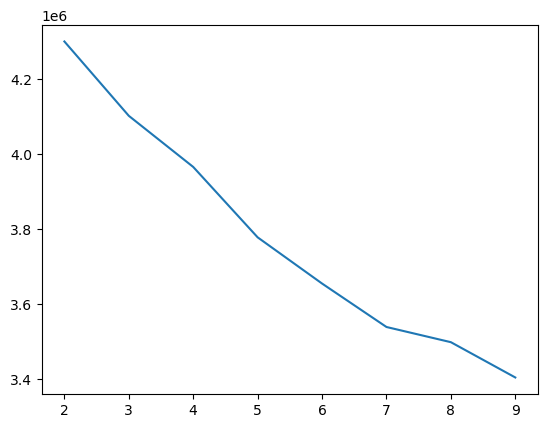

In [135]:
sns.lineplot(x=range(2,10),y=wcss)

In [136]:
from sklearn.metrics import silhouette_score

scores = []

for i in range(2,6):
    km = KMeans(n_clusters=i,random_state=100)
    clusters = km.fit_predict(df_scaled)
    scores.append(silhouette_score(df_scaled,clusters,random_state=100))
scores

[0.10985899615382859,
 0.09616761886793698,
 0.10040087206952773,
 0.09974936681654809]

In [137]:
pd.DataFrame(scores,index=range(2,6)).idxmax()

0    2
dtype: int64

In [143]:
km = KMeans(n_clusters=2,random_state=100)
clusters = km.fit_predict(df_scaled)

In [144]:
df['clusters'] = clusters

<Axes: xlabel='funded_amnt', ylabel='out_prncp'>

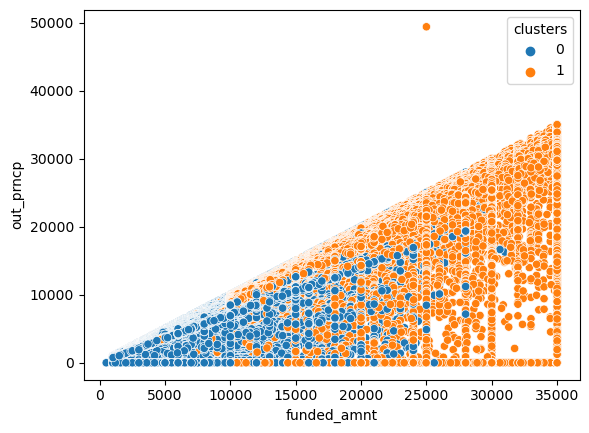

In [145]:
sns.scatterplot(x=df.funded_amnt,y=df.out_prncp,hue=df.clusters)

In [146]:
df[df.clusters == 0].describe()

,grade,sub_grade,emp_title,emp_length,home_ownership,purpose,title,addr_state,36 months,60 months,Not Verified,Verified,f,w,INDIVIDUAL,JOINT,issue_d_day,issue_d_month,issue_d_dayofweek,last_pymnt_d_day,last_pymnt_d_month,last_pymnt_d_dayofweek,earliest_cr_line_day,earliest_cr_line_month,earliest_cr_line_dayofweek,last_credit_pull_d_day,last_credit_pull_d_month,last_credit_pull_d_dayofweek,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,clusters
count,59906.000000,59906.000000,59906.000000,59906.000000,59906.000000,59906.000000,59906.000000,59906.000000,59906.000000,59906.000000,59906.000000,59906.000000,59906.000000,59906.000000,59906.000000,59906.000000,59906.000000,59906.0,59906.000000,59906.000000,59906.0,59906.000000,59906.000000,59906.0,59906.000000,59906.000000,59906.0,59906.000000,59906.000000,59906.000000,59906.000000,5.990600e+04,59906.000000,59906.000000,59906.000000,59906.000000,59906.000000,59906.000000,59906.000000,59906.000000,59906.000000,59906.000000,59906.000000,59906.000000,59906.000000,59906.000000,59906.000000,59906.000000,59906.000000,59906.000000,59906.000000,5.990600e+04,59906.000000,59906.000000,59906.0
mean,1.323807,8.560027,25077.549478,6.386197,2.149751,2.691266,3157.772494,22.790138,0.950072,0.049928,0.424548,0.575452,0.548443,0.451557,0.999766,0.000234,7.028461,1.0,3.200998,4.469869,1.0,3.157363,6.770858,1.0,2.970571,2.243181,1.0,3.841268,10398.423363,11.680709,334.437593,6.438285e+04,17.273733,0.301355,0.640921,10.726421,0.214469,12146.436167,51.964398,23.379545,5389.015503,5626.507630,4664.381131,939.345321,0.234860,22.546320,2.155679,1527.976596,0.016025,0.003923,235.568474,1.071413e+05,25595.769960,0.051297,0.0
std,1.063895,5.245303,13880.775912,4.022990,1.913842,2.452878,1704.949795,15.173529,0.217798,0.217798,0.494278,0.494278,0.497652,0.497652,0.015286,0.015286,3.360916,0.0,1.976824,4.502054,0.0,1.758671,3.405332,0.0,2.009240,2.974199,0.0,0.970490,5418.549205,3.678870,171.095698,3.817863e+04,8.206361,0.852836,0.924970,4.878255,0.565728,11019.007359,23.927232,11.218343,5596.389633,5251.858031,4682.004464,811.365760,2.491690,193.210808,29.610661,2989.904395,0.150929,0.084336,1770.358123,1.163780e+05,21244.761323,0.220605,0.0
min,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,1.000000,1.0,0.000000,1.000000,1.0,0.000000,1.000000,1.0,0.000000,500.000000,5.320000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0
25%,1.000000,5.000000,12935.750000,3.000000,0.000000,1.000000,1993.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,1.0,2.000000,1.000000,1.0,2.000000,4.000000,1.0,1.000000,1.000000,1.0,4.000000,6000.000000,8.390000,203.367500,4.000000e+04,11.110000,0.000000,0.000000,7.000000,0.000000,5291.250000,34.100000,15.000000,0.000000,1521.535000,1089.470000,310.222500,0.000000,0.000000,0.000000,229.140000,0.000000,0.000000,0.000000,2.402800e+04,12052.500000,0.000000,0.0
50%,1.000000,8.000000,25968.000000,6.000000,3.000000,2.000000,2589.000000,22.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,7.000000,1.0,3.000000,1.000000,1.0,4.000000,7.000000,1.0,3.000000,1.000000,1.0,4.000000,10000.000000,11.550000,311.940000,5.600000e+04,16.720000,0.000000,0.000000,10.000000,0.000000,9393.500000,52.000000,22.000000,4223.315000,3866.960000,2961.475000,711.015000,0.000000,0.000000,0.000000,358.270000,0.000000,0.000000,0.000000,5.753500e+04,19800.000000,0.0

In [147]:
df[df.clusters == 1].describe()

,grade,sub_grade,emp_title,emp_length,home_ownership,purpose,title,addr_state,36 months,60 months,Not Verified,Verified,f,w,INDIVIDUAL,JOINT,issue_d_day,issue_d_month,issue_d_dayofweek,last_pymnt_d_day,last_pymnt_d_month,last_pymnt_d_dayofweek,earliest_cr_line_day,earliest_cr_line_month,earliest_cr_line_dayofweek,last_credit_pull_d_day,last_credit_pull_d_month,last_credit_pull_d_dayofweek,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,clusters
count,35094.000000,35094.000000,35094.000000,35094.000000,35094.000000,35094.000000,35094.000000,35094.000000,35094.000000,35094.000000,35094.000000,35094.000000,35094.000000,35094.000000,35094.000000,35094.000000,35094.000000,35094.0,35094.000000,35094.000000,35094.0,35094.000000,35094.000000,35094.0,35094.000000,35094.000000,35094.0,35094.000000,35094.000000,35094.000000,35094.000000,3.509400e+04,35094.000000,35094.000000,35094.000000,35094.000000,35094.000000,35094.000000,35094.000000,35094.000000,35094.000000,35094.000000,35094.000000,35094.000000,35094.000000,35094.000000,35094.000000,35094.000000,35094.000000,35094.000000,35094.000000,3.509400e+04,3.509400e+04,35094.000000,35094.0
mean,2.535106,14.687639,23859.470878,7.045435,1.440959,2.334331,2892.966034,23.753890,0.282897,0.717103,0.094603,0.905397,0.458540,0.541460,0.998917,0.001083,6.920271,1.0,3.223742,4.302245,1.0,3.165270,6.722260,1.0,2.981877,2.114663,1.0,3.844104,22192.388300,15.711785,612.495652,9.398574e+04,19.565845,0.344247,0.753576,12.942925,0.158403,24757.435260,60.131591,28.567048,13242.227575,11183.370895,7945.945442,3150.862295,0.453040,86.110130,9.267057,3430.045569,0.012424,0.006896,165.941118,1.918154e+05,4.190674e+04,0.058756,1.0
std,1.322763,6.477464,13203.514166,3.950183,1.848901,1.891271,1405.938061,15.122955,0.450413,0.450413,0.292670,0.292670,0.498285,0.498285,0.032889,0.032889,3.380600,0.0,1.935612,4.539072,0.0,1.737508,3.404275,0.0,2.011780,2.871851,0.0,0.934099,7446.509866,4.282280,251.768221,1.096870e+05,8.395716,0.909712,1.028128,5.710072,0.521021,29983.831597,22.552278,12.113453,10112.206913,10250.739676,8833.502114,2784.999272,4.718423,595.033765,89.787912,6840.003695,0.122961,0.091892,1428.925361,1.807128e+05,4.084897e+04,0.235172,0.0
min,0.000000,0.000000,2.000000,0.500000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,1.000000,1.0,0.000000,1.000000,1.0,0.000000,1.000000,1.0,0.000000,2000.000000,5.320000,58.120000,5.000000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.0
25%,2.000000,10.000000,12354.000000,3.000000,0.000000,2.000000,2279.000000,9.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,1.0,2.000000,1.000000,1.0,2.000000,4.000000,1.0,1.000000,1.000000,1.0,4.000000,16000.000000,12.690000,409.470000,5.800000e+04,13.510000,0.000000,0.000000,9.000000,0.000000,10525.250000,44.500000,20.000000,0.000000,3183.240000,1546.950000,1182.527500,0.000000,0.000000,0.000000,432.762500,0.000000,0.000000,0.000000,5.369525e+04,1.950000e+04,0.000000,1.0
50%,2.000000,14.000000,24646.000000,8.000000,0.000000,2.000000,2589.000000,23.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,7.000000,1.0,3.000000,1.000000,1.0,4.000000,7.000000,1.0,3.000000,1.000000,1.0,4.000000,21000.000000,15.610000,569.610000,7.850200e+04,19.240000,0.000000,0.000000,12.000000,0.000000,18514.500000,61.700000,27.000000,13697.270000,7409.990000,3946.890000,2407.790000,0.000000,0.000000,0.000000,642.260000,0.000000,0.000000,0.000000,1.506190